In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# these three imports are aliased as np, pd, and plt by convention
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# other imports can go here
from datetime import datetime

In [3]:
df = pd.read_csv('revs_scored_jan.tsv', sep='\t', header=0)

In [4]:
print(df)

         rev_timestamp   page_id     rev_id prev_rev_id  is_minor  \
0           1546300800  47649229  876227289   869530001      True   
1           1546300801  47642850  876227292   869530006      True   
2           1546300801  59537875  876227290        None     False   
3           1546300801  60902958  876227291   869530004      True   
4           1546300802  31392285  876227293   876069768      True   
...                ...       ...        ...         ...       ...   
4766347     1548979197   1904845  881187547   868089901      True   
4766348     1548979198  24973891  881187550   881177866     False   
4766349     1548979198  47592150  881187546   881187304     False   
4766350     1548979198  57420342  881187549   881187524      True   
4766351     1548979199  59823847  881187551   881187083     False   

              user_text   user_id seconds_to_prev  curr_bytes delta_bytes  \
0                BD2412    196446         3696519        1195          -9   
1                



Bot revisions are those where `user_is_bot` is true. Question: How many bots made edits in January 2019? (Hint: The name of the user who made the revision is given in the user_text column. I am asking: how many unique 'user_text' values are there for rows where user_is_bot == True? There is a Pandas function that does this, but there are several reasonable approaches.)
===


In [5]:
df.user_is_bot.value_counts()

False    4241207
True      525145
Name: user_is_bot, dtype: int64

In [6]:
# number of unique bot ids

dfnew = df[df.user_is_bot]
len(dfnew.user_text.value_counts())

105

What % of bots edits are reverted and what % of human edits are reverted?  (Hint: This is already in the notebook.  Read the documentation for the crosstab command.  The column "is_reverted" tells you whether a revisions was reverted or not (according to a very particular discussion of "reverted", which we will discuss later).)
===

In [7]:
# percentage of bot edits reverted: 5%
# percentage of human edits reverted: 10%

pd.crosstab(df.user_is_bot, df.is_reverted, margins=True, normalize='index').round(decimals=3)

is_reverted,False,True
user_is_bot,,
False,0.898,0.102
True,0.950,0.050
All,0.903,0.097


What bot has the most revisions in the dataset? (Hint: already in the notebook. See: pd.DataFrame.value_counts.) What does Cydebot do?  Try to find the original bot approval discussion for Cydebot. (Hint: read about the bot approvals process, find the archived bot approvals list, look for Cydebot. Extra credit: Is Cydebot still running as of June 2021?  If not, what happened to it and why?)

In [8]:
dfnew.user_text.value_counts().head(1)

Cydebot    42742
Name: user_text, dtype: int64

Cydebot looks at discussions about category deletion, then automatically goes through and deletes mentions of those pages after discussions are concluded.

https://en.wikipedia.org/wiki/Special:Contributions/Cydebot
https://en.wikipedia.org/wiki/Wikipedia:Categories_for_discussion/Log/2020_January_2#Bunch_of_journal/magazine_people_categories

Cydebot was banned because it was deleting things even though no consensus was reached in the discussion (linked).

https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cydebot_4
^^ approval discussion

Look at some revisions made by Cydebot.  Wikipedia let's you construct URLs with the rev_id directly (which is a poorly documented feature): use this to specifically look at changes made by Cydebot, e.g. https://en.wikipedia.org/w/index.php?diff=879519093  No, but really: what does Cydebot do?
===

In [9]:
dfcydebot = dfnew[dfnew.user_text == 'Cydebot']
print(dfcydebot.columns)

Index(['rev_timestamp', 'page_id', 'rev_id', 'prev_rev_id', 'is_minor',
       'user_text', 'user_id', 'seconds_to_prev', 'curr_bytes', 'delta_bytes',
       'has_edit_summary', 'is_reverted', 'is_revert',
       'is_reverted_to_by_other', 'is_self_reverted', 'is_self_revert',
       'revert_target_id', 'revert_set_size', 'revert_id', 'seconds_to_revert',
       'damaging_pred', 'goodfaith_pred', 'model_version', 'user_is_bot',
       'user_is_trusted', 'user_edit_count', 'page_rev_count',
       'page_namespace', 'is_page_redirect'],
      dtype='object')


In [10]:
# based on a couple of different revision IDs, we can see the Cydebot deletes a lot, and also makes revisions on user's 
# "work-in-progress" pages?
#

dfcydebot.sample(n = 20)


,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,delta_bytes,...,seconds_to_revert,damaging_pred,goodfaith_pred,model_version,user_is_bot,user_is_trusted,user_edit_count,page_rev_count,page_namespace,is_page_redirect
2835502,1547913081,28086725,879180011,815346700,True,Cydebot,1215485,34674393,4264,-37,...,None,0.007348,0.995309,0.5.0,True,True,6515095,2,0,0
662201,1546682420,54113220,876917906,876917901,True,Cydebot,1215485,2,386,-376,...,None,0.025626,0.988039,0.4.0,True,True,6477662,3,14,0
1994140,1547433064,43091518,878302953,613482267,True,Cydebot,1215485,144305662,1735,-54,...,None,0.005829,0.996187,0.5.0,True,True,6509175,1,2,0
1945304,1547417922,32811473,878251674,445871227,True,Cydebot,1215485,233548062,1725,-53,...,None,0.004931,0.996483,0.5.0,True,True,6496566,1,2,0
1986306,1547430053,48168142,878294809,685203623,True,Cydebot,1215485,102857889,385,-54,...,None,0.008939,0.993754,0.5.0,True,True,6506398,1,2,0
1997271,1547434257,55558913,878306241,807994340,True,Cydebot,1215485,38000367,1247,-53,...,None,0.008992,0.993206,0.5.0,True,True,6510180,1,2,0
1874709,1547388648,34130843,878177132,848139987,True,Cydebot,1215485,17067765,24859,-53,...,None,0.006436,0.993246,0.5.0,True,True,6484613,6,0,0
77493,1546356543,3125867,876307857,851269235,True,Cydebot,1215485,14206837,10018,13,...,None,0.007150,0.992789,0.4.0,True,True,6475952,4,0,0
1951220,1547419873,29305151,878257973,862408180,True,Cydebot,1215485,8788614,2799,-53,...,None,0.008156,0.994825,0.5.0,True,True,6498245,1,0,0
3482235,1548275490,8993207,879853796,879850523,True,Cydebot,1215485,1514,4058,256,...,None,0.005382,0.996526,0.5.0,True,True,6517537,17309,2,0


First through fifth revisions just deleted categories from pages - Articles Created by Article Wizard. rev ids: 878282326, 878178639, 878225282, 878305994, 878255096

https://en.wikipedia.org/wiki/Wikipedia:Categories_for_discussion/Log/2019_January_6#Category:Articles_created_via_the_Article_Wizard -- discussion from which Cydebot deleted some categories

Note: What is a category? What does it mean to delete it?


The ORES model's prediction of damage is stored in the damaging_pred column. What revision made by Cydebot has the highest ORES damaging score?
===


In [11]:
dfcydebot.damaging_pred.max()

0.08141379906777768

In [12]:
dfcydebot[dfcydebot.damaging_pred > .07]

,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,delta_bytes,...,seconds_to_revert,damaging_pred,goodfaith_pred,model_version,user_is_bot,user_is_trusted,user_edit_count,page_rev_count,page_namespace,is_page_redirect
462491,1546559652,8993145,876709746,876709158,True,Cydebot,1215485,362,0,-337,...,None,0.081414,0.963045,0.4.0,True,True,6477045,3498,2,0
957434,1546854863,13784401,877224110,877223688,True,Cydebot,1215485,340,85,-318,...,None,0.073652,0.961676,0.4.0,True,True,6478578,68254,2,1


Most damaging revision: https://en.wikipedia.org/w/index.php?diff=876709746

Appears to be changing its own page (possibly because it finished deleting these categories?). Why does ORES think this is damaging?

Using Matplotlib, plot a histogram of ORES damaging scores for revisions made by Cydebot.
===

In [13]:
dfcydebot_damaging_score = dfcydebot[["damaging_pred"]]

array([[<AxesSubplot:title={'center':'damaging_pred'}>]], dtype=object)

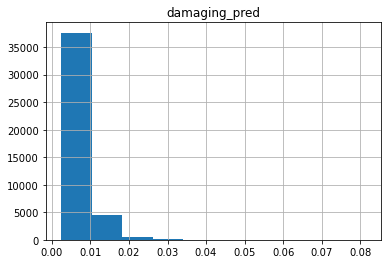

In [14]:
dfcydebot_damaging_score.hist()  

In [15]:
dfcydebot_damaging_score

,damaging_pred
67,0.003268
78,0.010788
1738,0.005640
5301,0.006138
5846,0.005872
...,...
4764319,0.013716
4764333,0.008180
4765042,0.006552
4765058,0.009667


Hard: Using Matplotlib, plot the number of revisions made per day in January 2019 (x-axis is date, y-axis is # of revisions).  The column rev_timestamp gives each revision's original time in number of seconds since the Unix epoch; look up datetime.utcfromtimestamp() and datetime.fromtimestamp(rev_timestamp, pytz.UTC).  Identifying days can be tricky, but the Wikipedia standard is to use UTC.  You'll need to figure out how many revisions occur on each day: I would recommend using np.histogram for this, although you'll need to determine how to form the bin edges. Get the xticks to be somewhat reasonable i.e. dates.
===


In [17]:
df_time = df[["rev_timestamp"]]
df_time

,rev_timestamp
0,1546300800
1,1546300801
2,1546300801
3,1546300801
4,1546300802
...,...
4766347,1548979197
4766348,1548979198
4766349,1548979198
4766350,1548979198


In [21]:
datetime.utcfromtimestamp(1546300800)

datetime.datetime(2019, 1, 1, 0, 0)

In [25]:
datetime.utcfromtimestamp(1546300800).day

1

In [31]:
datetime.utcfromtimestamp(1546300801)

datetime.datetime(2019, 1, 1, 0, 0, 1)

In [27]:
datetime.utcfromtimestamp(1548979198).day

31

In [32]:
df_time_day = df_time.applymap(lambda x: datetime.utcfromtimestamp(x).day)

In [33]:
df_time_day

,rev_timestamp
0,1
1,1
2,1
3,1
4,1
...,...
4766347,31
4766348,31
4766349,31
4766350,31


array([[<AxesSubplot:title={'center':'rev_timestamp'}>]], dtype=object)

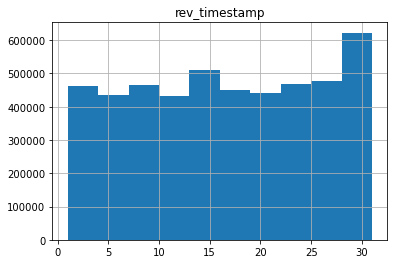

In [34]:
df_time_day.hist()